<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
BERT
</div>




* BERT is an open-source machine learning framework for natural language processing (NLP) that enables computers to understand the meaning of text.
* BERT is designed to disambiguate language in text by using surrounding context to establish context.
* BERT, which stands for Bidirectional Encoder Representations from Transformers, is based on the Transformer model, where every output element is connected to every input element, and the weights between them are dynamically calculated based on their connection.

* BERT can be used to improve the accuracy of NLP tasks such as sentiment analysis, question answering, and text classification.
* BERT can be fine-tuned for specific NLP tasks, allowing it to adapt to new domains and datasets.
* BERT's ability to understand context and disambiguate language makes it a powerful tool for natural language processing applications.

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    BERT Fine Tuning
<br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [5]:
!pip install ktrain keras tensorflow==2.15.1 -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 57.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 61.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.8 MB/s eta 0

In [6]:
import ktrain
from ktrain import text
import tensorflow as tf
import numpy as np
import pandas as pd

In [7]:
import pandas as pd


import pandas as pd
url= 'https://drive.google.com/file/d/15xioKvjl84ODzDwJJ2_hjznQ-i__4aAx/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, sep='\t', names=['label','text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.model_selection import train_test_split
data_train, data_text = train_test_split(df, test_size=0.2, random_state=0)

In [9]:
data_train.shape, data_text.shape

((4457, 2), (1115, 2))

In [10]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(
    train_df=data_train,
    text_column='text',
    label_columns='label',
    val_df=data_text,
    preprocess_mode='bert' # or distilbert
)

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [11]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
x_train

[array([[  101,  2053,  1045, ...,     0,     0,     0],
        [  101,  2065,  2017, ...,     0,     0,     0],
        [  101,  2031,  2017, ...,     0,     0,     0],
        ...,
        [  101,  2005, 24471, ...,     0,     0,     0],
        [  101,  1054,  1057, ...,     0,     0,     0],
        [  101,  3461,  3110, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [13]:
model =  text.text_classifier(
    name='bert',
    train_data=(x_train, y_train),
    preproc=preproc
)

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [14]:
# here we have taken batch size as 6 as from the documentation it is recommeded to use this with maxlen 500
learner = ktrain.get_learner(
    model=model,
    train_data=(x_train, y_train),
    val_data=(x_test, y_test),
    batch_size=6
)

In [15]:
learner

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 460s 586ms/step - loss: 0.2905 - accuracy: 0.8928
Epoch 2/2
743/743 [==============================] - 186s 249ms/step - loss: 2.3109 - accuracy: 0.8069


done.
Visually inspect loss plot and select learning rate associated with falling loss


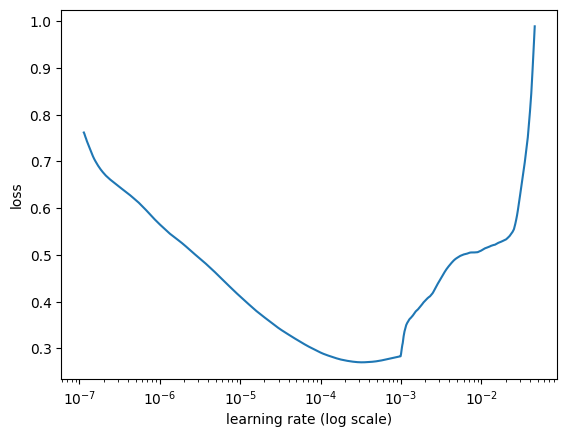

In [16]:
learner.lr_find(show_plot=True, max_epochs=2)

In [17]:
learner.fit_onecycle(lr=10e-3, epochs=1)
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('bert--classifier')



begin training using onecycle policy with max lr of 0.01...
743/743 [==============================] - 504s 651ms/step - loss: 0.6982 - accuracy: 0.8187 - val_loss: 0.4450 - val_accuracy: 0.8565


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:

import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

file_id = '1sEklSjd341N6U2hkqu4yZX6hsNmWZX9_'
destination = '/content/downloaded_file.txt'
download_file_from_google_drive(file_id, destination)

with open(destination, 'r') as file:
    lines = file.readlines()

In [27]:
lines[0]

'Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n'

In [28]:
predictor.predict(lines[0])

'ham'